In [3]:
import urllib.request

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import os
from sympy import lambdify

#import wget

In [4]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/InterpolacionNewton.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewton.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    
else:
    Path_ = file

Data = pd.read_csv(Path_)
Data

,X,Y
0,-3,39
1,-1,19
2,1,-21
3,3,-57
4,5,-65
5,7,-21
6,9,99


In [15]:
X = np.array([1,2,3,4,5])
Y = np.array([-3.4,-5.6,0,3,3.5])

#X = np.float64(Data.X)
#Y = np.float64(Data.Y)
print(X,Y)

[1 2 3 4 5] [-3.4 -5.6  0.   3.   3.5]


In [16]:
def Lagrange(x, xi, i):
    """ x es el punto que se quiere aproximar
        xi son todos los puntos de la función original
        i es la iteración de los puntos de la función original
        """
    prod = 1.
    n = len(xi)
    
    for j in range(n):
        if i!=j:
            prod *= (x - xi[j])/(xi[i]-xi[j])
    return prod

In [17]:
def Interpolate(x, xi, yi):
    """ x es el punto que se quiere aproximar
        xi son todos los puntos del eje x de la función original
        yi son los puntos del eje Y de la función original
        """
    Sum = 0
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x, xi, j)
        
    return Sum

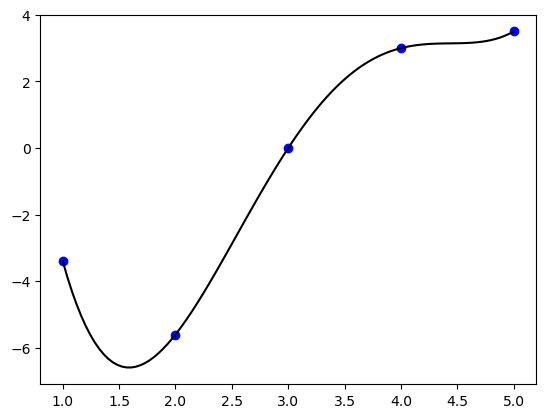

In [18]:
x = np.linspace(X[0],X[-1],100)
y = Interpolate(x,X,Y)

plt.scatter(X,Y,marker='o', color='b')
plt.plot(x,y,color='k')

In [19]:
x = sym.Symbol('x', real=True)

f = Interpolate(x, X, Y)
f1 = sym.simplify(f)

In [20]:
func = lambdify([x], f1, modules='numpy')

In [21]:
f = Interpolate(x,X,Y)
f = sym.simplify(f)
f

0.4375*x**4 - 6.10833333333333*x**3 + 29.6125*x**2 - 54.8416666666667*x + 27.5

In [22]:
def der_func(x,h):
    return (func(x+h)-func(x-h))/(2*h)

def der2_func(x,h):
    return (func(x+h)-2*func(x)+func(x-h))/(h**2)

def newtrap (x):
    return x-(der_func(x,0.01)/der2_func(x,0.01))


x1= 1
for i in range(100):
    X1 = x1
    x1 = newtrap(x1)
    if np.abs(X1-x1)<=(10**(-6)):
        sol = x1

func(sol)



-6.5922772122187965

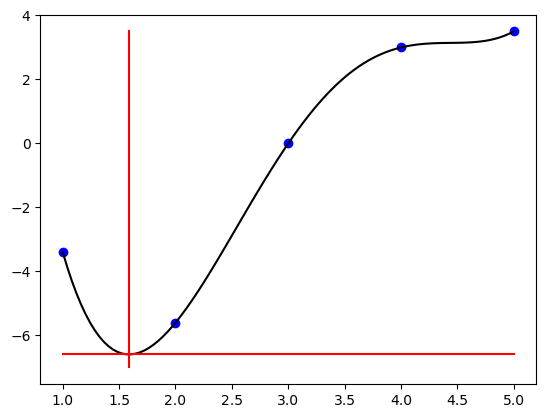

In [24]:
x = np.linspace(X[0],X[-1],100)
y = Interpolate(x,X,Y)

plt.scatter(X,Y,marker='o', color='b')
plt.plot(x,y,color='k')

plt.plot([X[0],X[-1]],[func(sol),func(sol)],"r")
plt.plot([sol,sol],[-7,Y[-1]],"r")

#plt.scatter(sol, func(sol),color= 'r')